## Introducción

Entrenamiento de modelo preentrenado para resolver el problema de predecir el ángulo del auto en base a la imagen.

Fuertemente basado en:
- https://towardsdatascience.com/a-practical-example-in-transfer-learning-with-pytorch-846bb835f2db
- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html 

## Imports

In [5]:
import torch
import dataset_modules.image_preloader as image_preloader
import main
import importlib
import dataset_modules.preloaded_one_part_dataset as popd
import torchvision.transforms as transforms

importlib.reload(main)
importlib.reload(popd)

<module 'dataset_modules.preloaded_one_part_dataset' from '/clusteruy/home/franco.cuevas/tesis-jupyters-2/dataset_modules/preloaded_one_part_dataset.py'>

## Variables

In [2]:
FEATURE_EXTRACTION = False

device_string = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_string)

if device_string == "cuda":
    print("Usando GPU!")

Usando GPU!


In [3]:
# preload images
preloaded_images = image_preloader.preload_images(
        images_folder='./dataset_modules/imgs/', 
        state_file='./dataset_modules/state.json', 
        resize_to=224
)

Started to preload images...
Image preloading complete in 6m 37s
The preloaded images use 0.140716552734375MB of memory


LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: capot_sano, #988, 60.17%
Class: capot_roto, #654, 39.83%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: capot_sano, #242, 58.74%
Class: capot_roto, #170, 41.26%
#TRAIN 1642 #TEST 412
Epoch 0/99
----------
train Loss: 0.6687 Main metric (macro_f1): 0.4446 Time: 13.90s
test Loss: 0.6504 Main metric (macro_f1): 0.4525 Time: 1.48s
Epoch 1/99
----------
train Loss: 0.6344 Main metric (macro_f1): 0.5674 Time: 12.60s
test Loss: 0.6385 Main metric (macro_f1): 0.4650 Time: 1.51s
ES Module Best: 0.6384891069051132, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.6021 Main metric (macro_f1): 0.6272 Time: 12.62s
test Loss: 0.6124 Main metric (macro_f1): 0.6460 Time: 1.49s
ES Module Best: 0.6123664049268926, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.5685 Main metric (macro_f1): 0.6810 Time: 12.57s
test Loss: 0.5964 Main metric (macro_f1): 0.6430 Time: 1.49s
ES Module Best: 0.5964164762821013, BadEpochs: 0
Epoch 4/99
----------
train Loss: 0.

,class,precision,recall,f1
0,capot_roto,0.718310,0.600000,0.653846
1,capot_sano,0.748148,0.834711,0.789062


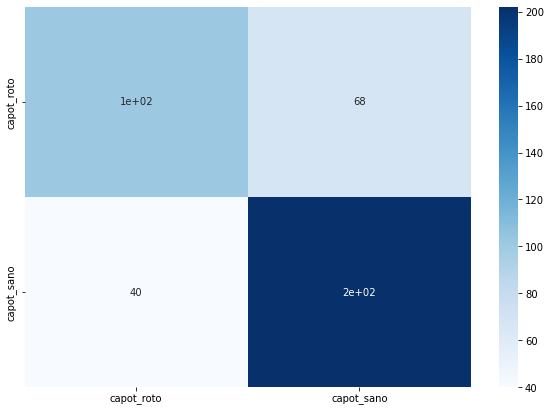

In [4]:
part = "Capot"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "capot_only_metadata"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=False
)

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: capot_sano, #1172, 71.38%
Class: capot_roto, #470, 28.62%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: capot_sano, #285, 69.17%
Class: capot_roto, #127, 30.83%
#TRAIN 1642 #TEST 412
Epoch 0/99
----------
train Loss: 0.5906 Main metric (macro_f1): 0.4208 Time: 12.52s
test Loss: 0.5913 Main metric (macro_f1): 0.4089 Time: 1.44s
Epoch 1/99
----------
train Loss: 0.5559 Main metric (macro_f1): 0.4445 Time: 12.43s
test Loss: 0.5670 Main metric (macro_f1): 0.4851 Time: 1.45s
ES Module Best: 0.5669779326151876, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.5245 Main metric (macro_f1): 0.5226 Time: 12.71s
test Loss: 0.5469 Main metric (macro_f1): 0.5431 Time: 1.51s
ES Module Best: 0.5468715979057608, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.4960 Main metric (macro_f1): 0.6059 Time: 12.45s
test Loss: 0.5306 Main metric (macro_f1): 0.6554 Time: 1.44s
ES Module Best: 0.5306144863077737, BadEpochs: 0
Epoch 4/99
----------
train Loss: 0

,class,precision,recall,f1
0,capot_roto,0.734694,0.566929,0.640000
1,capot_sano,0.824841,0.908772,0.864775


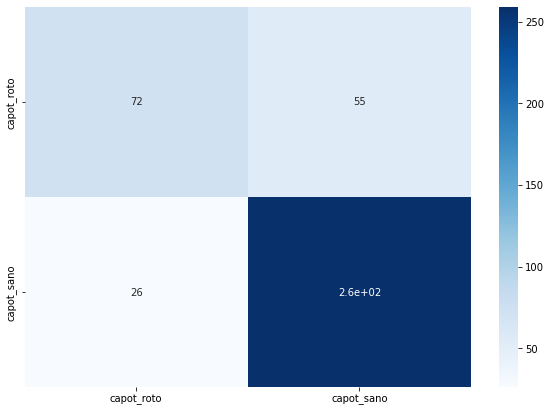

In [6]:
part = "Capot"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "capot_use-selected-parts"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True
)

----- CLASS DISTRIBUTION -----
Class: capot_sano, #1457, 70.93%
Class: capot_roto, #597, 29.07%
2054
tensor([1.7203, 0.7049])
LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: capot_sano, #1172, 71.38%
Class: capot_roto, #470, 28.62%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: capot_sano, #285, 69.17%
Class: capot_roto, #127, 30.83%
#TRAIN 1642 #TEST 412
Epoch 0/99
----------
train Loss: 0.6824 Main metric (macro_f1): 0.5631 Time: 12.41s
test Loss: 0.6649 Main metric (macro_f1): 0.5850 Time: 1.44s
Epoch 1/99
----------
train Loss: 0.6317 Main metric (macro_f1): 0.6614 Time: 12.41s
test Loss: 0.6340 Main metric (macro_f1): 0.6005 Time: 1.44s
ES Module Best: 0.6339636705454114, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.5858 Main metric (macro_f1): 0.7123 Time: 12.41s
test Loss: 0.6057 Main metric (macro_f1): 0.6613 Time: 1.44s
ES Module Best: 0.6057158754867258, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.5343 Main metric (macro_f1): 0.7518 Time: 12.49s
test Loss: 0.5866 M

,class,precision,recall,f1
0,capot_roto,0.67619,0.559055,0.612069
1,capot_sano,0.81759,0.880702,0.847973


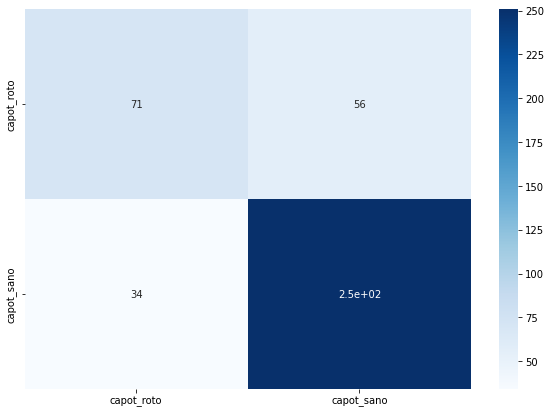

In [9]:
import sklearn
part = "Capot"
dataset = popd.PreloadedOnePartDataset(
    part,
    preloaded_images,
    remove_not_visible=True,
    use_selected_parts=True
)

print(len(dataset.samples))
y = [y_s for (_,y_s,_) in dataset.samples]
balanced_weights = sklearn.utils.class_weight.compute_class_weight('balanced', classes=[0,1], y=y)
balanced_weights = torch.tensor(balanced_weights,dtype=torch.float)
print(balanced_weights)

MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "capot_use-selected-parts_balanced-weights"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True,
    class_weights=balanced_weights
)

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: capot_sano, #1172, 55.49%
Class: capot_roto, #940, 44.51%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: capot_sano, #285, 69.17%
Class: capot_roto, #127, 30.83%
#TRAIN 2112 #TEST 412
Epoch 0/99
----------
train Loss: 0.6674 Main metric (macro_f1): 0.5593 Time: 20.44s
test Loss: 0.6207 Main metric (macro_f1): 0.6380 Time: 1.49s
Epoch 1/99
----------
train Loss: 0.6088 Main metric (macro_f1): 0.6704 Time: 16.29s
test Loss: 0.5752 Main metric (macro_f1): 0.6782 Time: 1.56s
ES Module Best: 0.5752416305171634, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.5569 Main metric (macro_f1): 0.7305 Time: 16.36s
test Loss: 0.5453 Main metric (macro_f1): 0.6950 Time: 1.56s
ES Module Best: 0.5452546292138332, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.5093 Main metric (macro_f1): 0.7714 Time: 16.18s
test Loss: 0.5469 Main metric (macro_f1): 0.7157 Time: 1.56s
ES Module Best: 0.5452546292138332, BadEpochs: 1
Epoch 4/99
----------
train Loss: 0

,class,precision,recall,f1
0,capot_roto,0.661017,0.614173,0.636735
1,capot_sano,0.833333,0.859649,0.846287


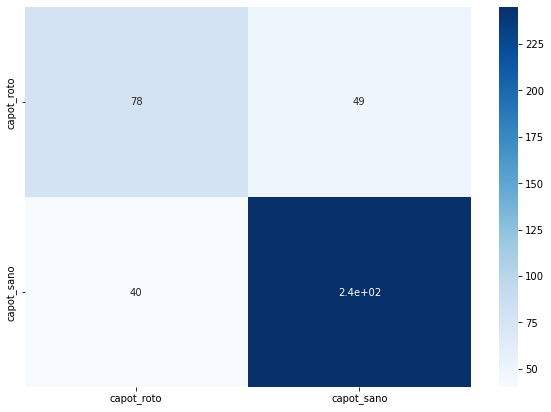

In [6]:
part = "Capot"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "capot_use-selected-parts_dataug"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True,
    data_augmentation=transforms.Compose([transforms.RandomHorizontalFlip(p=1)]),
    class_to_augment=0,
    offline_augmentation=470
)